In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [34]:
# Bringing in data sets
PlayerStats = pd.read_csv('player_stats.csv', index_col=0, encoding = 'latin-1')
PlayerDims = pd.read_csv('player_dim.csv', index_col = 0, encoding = 'latin-1')
PlayerDraft = pd.read_csv('nhldraft.csv', index_col = 0, encoding = 'latin-1')
PlayerDraft_leaguename = pd.read_csv('nhldraft_leaguename.csv', index_col = 0, encoding = 'latin-1')




In [35]:
# Analyzing different draft picks and their potential in the league
# Adding round column

PlayerDraft = PlayerDraft.fillna(0)
PlayerDraft['amateur_team'] = PlayerDraft['amateur_team'].astype(str)
pattern = r'\(([^)]+)\)'
PlayerDraft['amateur_team'] = PlayerDraft['amateur_team'].str.extract(pattern, expand=False)


PlayerDraft["Round"] = np.nan
round_mapping = [
    (PlayerDraft['overall_pick'] >= 1) & (PlayerDraft['overall_pick'] <= 32),
    (PlayerDraft['overall_pick'] >= 33) & (PlayerDraft['overall_pick'] <= 64),
    (PlayerDraft['overall_pick'] >= 66) & (PlayerDraft['overall_pick'] <= 97),
    (PlayerDraft['overall_pick'] >= 99) & (PlayerDraft['overall_pick'] <= 130),
    (PlayerDraft['overall_pick'] >= 132) & (PlayerDraft['overall_pick'] <= 163),
    (PlayerDraft['overall_pick'] >= 165) & (PlayerDraft['overall_pick'] <= 196),
    (PlayerDraft['overall_pick'] >= 198) & (PlayerDraft['overall_pick'] <= 229),
    (PlayerDraft['overall_pick'] >= 230) & (PlayerDraft['overall_pick'] <= 262),
    (PlayerDraft['overall_pick'] >= 263) & (PlayerDraft['overall_pick'] <= 293),
]

# Define the corresponding number for each range
rounds = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Add the new column based on the conditions
PlayerDraft['Round'] = np.select(round_mapping, rounds)





In [36]:
# Creating Data frames based on each round 
First_Round = PlayerDraft[PlayerDraft['Round'] == 1]
Second_Round = PlayerDraft[PlayerDraft['Round'] == 2]
Third_Round = PlayerDraft[PlayerDraft['Round'] == 3]
Fourth_Round = PlayerDraft[PlayerDraft['Round'] == 4]
Fifth_Round = PlayerDraft[PlayerDraft['Round'] == 5]
Sixth_Round = PlayerDraft[PlayerDraft['Round'] == 6]
Seventh_Round = PlayerDraft[PlayerDraft['Round'] == 7]
Eighth_Round = PlayerDraft[PlayerDraft['Round'] == 8]
Ninth_Round = PlayerDraft[PlayerDraft['Round'] == 9]

# Seperating by years for example group 1 is 2000-2005, group 2 2006-2010, group 3 2011-2015, group 4 2015-2020
Group_1 = PlayerDraft[(PlayerDraft['year'] >= 2000) & (PlayerDraft['year'] <= 2005)]
Group_2 = PlayerDraft[(PlayerDraft['year'] >= 2006) & (PlayerDraft['year'] <= 2010)]
Group_3 = PlayerDraft[(PlayerDraft['year'] >= 2011) & (PlayerDraft['year'] <= 2015)]
Group_4 = PlayerDraft[(PlayerDraft['year'] >= 2016) & (PlayerDraft['year'] <= 2019)]



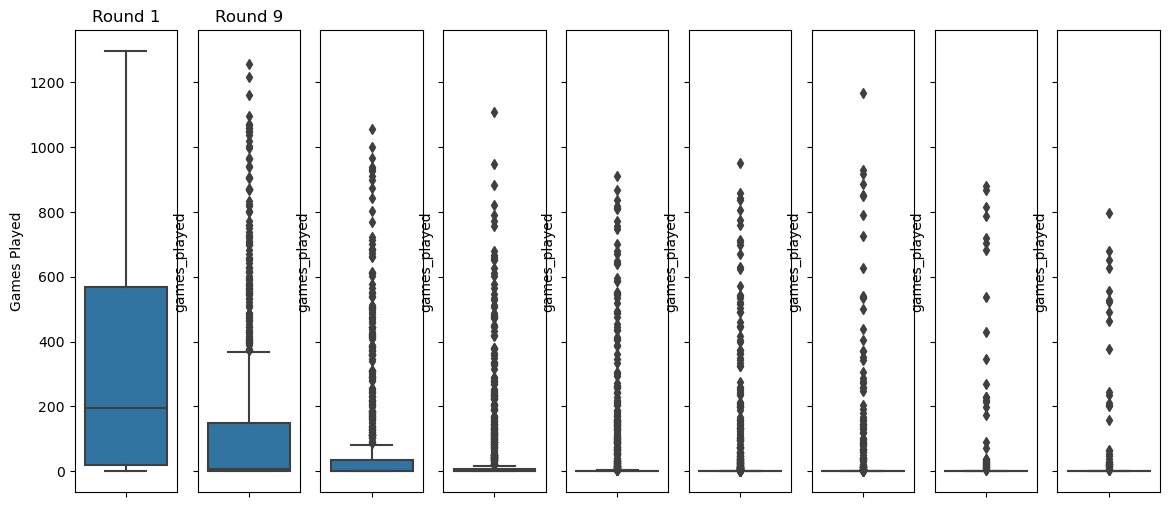

In [7]:
# Creating box plot for first round pics

fig, axs = plt.subplots(nrows=1, ncols=9, figsize=(14, 6), sharey=True)

sns.boxplot(data=First_Round, y='games_played', ax=axs[0])
axs[0].set_title('Round 1')
axs[0].set_ylabel('Games Played')

# Plot boxplot for Round 2
sns.boxplot(data=Second_Round, y='games_played', ax=axs[1])
axs[1].set_title('Round 2')

# Plot boxplot for Round 3
sns.boxplot(data=Third_Round, y='games_played', ax=axs[2])
axs[1].set_title('Round 3')

# Plot boxplot for Round 2
sns.boxplot(data=Fourth_Round, y='games_played', ax=axs[3])
axs[1].set_title('Round 4')

# Plot boxplot for Round 2
sns.boxplot(data=Fifth_Round, y='games_played', ax=axs[4])
axs[1].set_title('Round 5')

# Plot boxplot for Round 2
sns.boxplot(data=Sixth_Round, y='games_played', ax=axs[5])
axs[1].set_title('Round 6')

# Plot boxplot for Round 2
sns.boxplot(data=Seventh_Round, y='games_played', ax=axs[6])
axs[1].set_title('Round 7')

# Plot boxplot for Round 2
sns.boxplot(data=Eighth_Round, y='games_played', ax=axs[7])
axs[1].set_title('Round 8')

# Plot boxplot for Round 2
sns.boxplot(data=Ninth_Round, y='games_played', ax=axs[8])
axs[1].set_title('Round 9')


# Add labels and title


# Show the plot
plt.show()

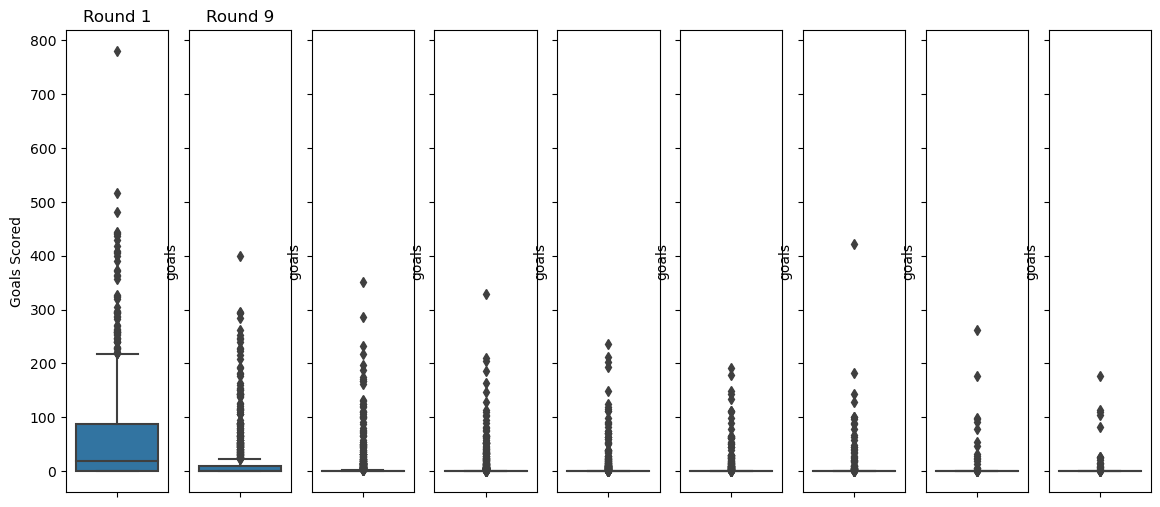

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=9, figsize=(14, 6), sharey=True)

sns.boxplot(data=First_Round, y='goals', ax=axs[0])
axs[0].set_title('Round 1')
axs[0].set_ylabel('Goals Scored')

# Plot boxplot for Round 2
sns.boxplot(data=Second_Round, y='goals', ax=axs[1])
axs[1].set_title('Round 2')

# Plot boxplot for Round 3
sns.boxplot(data=Third_Round, y='goals', ax=axs[2])
axs[1].set_title('Round 3')

# Plot boxplot for Round 2
sns.boxplot(data=Fourth_Round, y='goals', ax=axs[3])
axs[1].set_title('Round 4')

# Plot boxplot for Round 2
sns.boxplot(data=Fifth_Round, y='goals', ax=axs[4])
axs[1].set_title('Round 5')

# Plot boxplot for Round 2
sns.boxplot(data=Sixth_Round, y='goals', ax=axs[5])
axs[1].set_title('Round 6')

# Plot boxplot for Round 2
sns.boxplot(data=Seventh_Round, y='goals', ax=axs[6])
axs[1].set_title('Round 7')

# Plot boxplot for Round 2
sns.boxplot(data=Eighth_Round, y='goals', ax=axs[7])
axs[1].set_title('Round 8')

# Plot boxplot for Round 2
sns.boxplot(data=Ninth_Round, y='goals', ax=axs[8])
axs[1].set_title('Round 9')


# Add labels and title


# Show the plot
plt.show()

In [9]:
# Get residual function 
def get_residual(variable, variable_residuals):
    X = PlayerDraft_model['overall_pick'].values.reshape(-1, 1)
    y = PlayerDraft_model[variable].values

    model = make_pipeline(PolynomialFeatures(4), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X)


    residuals = y - y_pred
    PlayerDraft_model[variable_residuals] = residuals



The player(s) with the maximum score in the games_played residuals category of is/are: Joe Pavelski with a score of 1117.5405466037 
The player(s) with the maximum score in the goals residuals category of is/are: Alex Ovechkin with a score of 642.2079943527747 
The player(s) with the maximum score in the assists residuals category of is/are: Sidney Crosby with a score of 672.0192374726178 
The player(s) with the maximum score in the +/- residuals category of is/are: Brad Marchand with a score of 263.46410053554024 
The player(s) with the maximum score in the Pick Value Residual category of is/are: Patrice Bergeron with a score of 1925.0120648105903 


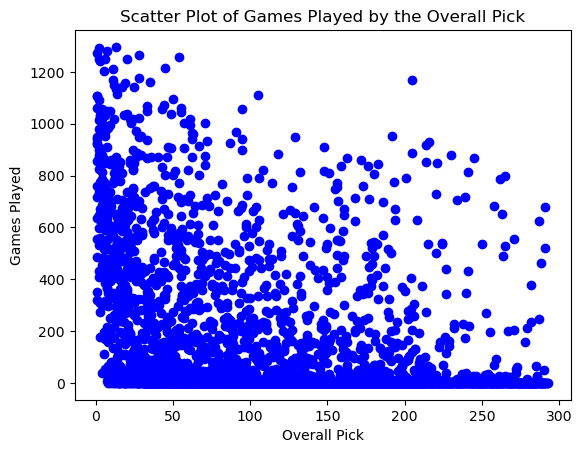

In [37]:
# Creating Linear regression model for output across each overall pick

threshold_value = 2015


PlayerDraft_model = PlayerDraft[PlayerDraft['year'] <= threshold_value].copy()


plt.scatter(PlayerDraft_model['overall_pick'], PlayerDraft_model['games_played'], color='blue', marker='o')

PlayerDraft_model = PlayerDraft_model.replace('H-East' , 'NCAA')
PlayerDraft_model = PlayerDraft_model.replace('NCAA-Ind' , 'NCAA')
PlayerDraft_model = PlayerDraft_model.replace('Ohio' , 'NCAA')
PlayerDraft_model = PlayerDraft_model.replace('CCHA' , 'NCAA')
PlayerDraft_model = PlayerDraft_model.replace('Big Ten' , 'NCAA')
PlayerDraft_model = PlayerDraft_model.replace('NCHC' , 'NCAA')
PlayerDraft_model = PlayerDraft_model.replace('ECAC' , 'NCAA')




PlayerDraft_model['games_played residuals'] = np.nan
PlayerDraft_model['goals residuals'] = np.nan
PlayerDraft_model['assists residuals'] = np.nan
PlayerDraft_model['+/- residuals'] = np.nan

#calling residual function to calculate for important values
get_residual('goals', 'goals residuals')
get_residual('assists' , 'assists residuals')
get_residual('plus_minus', '+/- residuals')
get_residual('games_played', 'games_played residuals')

#Summing up all important value residuals to create Value residual
PlayerDraft_model['Pick Value Residual'] = (PlayerDraft_model['games_played residuals'] * 0.75) + PlayerDraft_model['goals residuals'] + PlayerDraft_model['assists residuals'] + PlayerDraft_model['+/- residuals']



plt.title('Scatter Plot of Games Played by the Overall Pick')
plt.xlabel('Overall Pick')
plt.ylabel('Games Played')


pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Show the plot
#plt.show()

def get_max_of_column(column):
    max_score = PlayerDraft_model[column].max()

    # Step 2: Get the row(s) with the maximum value
    player_with_max_score = PlayerDraft_model[PlayerDraft_model[column] == max_score]

    # Step 3: Extract the player name(s)
    player_names = player_with_max_score['player'].tolist()

    # Convert list of player names to a comma-separated string
    player_names_str = ', '.join(player_names)

    # Print the result
    print(f"The player(s) with the maximum score in the {column} category of is/are: {player_names_str} with a score of {max_score} ")
    
get_max_of_column('games_played residuals')
get_max_of_column('goals residuals')
get_max_of_column('assists residuals')
get_max_of_column('+/- residuals')
get_max_of_column('Pick Value Residual')






In [30]:
# Function to add up values for top 5 leagues



def get_league_residual(df, league, stat):
    filtered_df = df[df['amateur_team'] == league]
    total_sum = filtered_df[stat].sum()
    return total_sum

row_names = ['OHL', 'WHL', 'QMJHL', 'BCHL', 'USHL' , 'NCAA', 'Finland', 'USDP/USHL', 'Russia Jr.', 'Sweden', 'Sweden Jr.', 'Swiss', 'Norway']
column_names = ['games_played residuals', 'assists residuals', 'goals residuals' , '+/- residuals', 'Pick Value Residual']

# Initialize the DataFrame with the row names as the index and column names as columns
Juniors_Leagues_Performance = pd.DataFrame(index=row_names, columns=column_names)

# Apply the function across the DataFrame
for row_name in Juniors_Leagues_Performance.index:
    for col_name in Juniors_Leagues_Performance.columns:
        Juniors_Leagues_Performance.loc[row_name, col_name] = get_league_residual(PlayerDraft_model, row_name, col_name)


get_league_residual( PlayerDraft_model,'OHL' , 'Pick Value Residual')
get_league_residual( PlayerDraft_model,'WHL' , 'Pick Value Residual')
get_league_residual( PlayerDraft_model,'QMJHL' , 'Pick Value Residual')
get_league_residual( PlayerDraft_model,'BCHL' , 'Pick Value Residual')
get_league_residual( PlayerDraft_model,'USHL' , 'Pick Value Residual')
get_league_residual( PlayerDraft_model,'NCAA' , 'Pick Value Residual')


Juniors_Leagues_Performance

games_played residuals assists residuals goals residuals  \
OHL                  15037.057377       3152.327383     3494.862491   
WHL                   -5017.07438      -4649.499659    -3424.795995   
QMJHL                -6890.831238         11.727251      -271.84254   
BCHL                   689.386737        283.055203       235.85641   
USHL                  4661.798345       1522.333881      868.109711   
NCAA                  6001.385108        481.045679       19.378419   
Finland               1028.666076        425.392845      -13.375078   
USDP/USHL             -802.994483       -585.673093     -405.165192   
Russia Jr.           -1009.141524        -79.431391      -24.711916   
Sweden                3612.300854       1360.854373       298.28443   
Sweden Jr.           -1583.225785        -320.41692      -492.58507   
Swiss                 -112.221293         208.78755     -101.279567   
Norway                  22.517453        -24.192435      -12.140071   

           +/- residuals Pick Value Residual  
OHL         -1864.632892        16060.350015  
WHL          -661.158388       -12498.259827  
QMJHL         799.132161        -4629.106556  
BCHL         -292.057063          743.894603  
USHL           74.720598         5961.512949  
NCAA          -254.12013         4747.342799  
Finland        69.576377         1253.093702  
USDP/USHL    -248.878513         -1841.96266  
Russia Jr.    129.233424         -731.766026  
Sweden        177.180272         4545.544715  
Sweden Jr.    352.512111        -1647.909217  
Swiss         -17.400674            5.941339  
Norway          -24.2204          -43.664816

In [44]:
# Adding league from player_stat to player_dim

player_league = pd.DataFrame(PlayerStats, columns=['PLAYER_ID', 'LEAGUE'])

PlayerDims_new = PlayerDims.merge(player_league, on='PLAYER_ID', how='right')
PlayerDims_new = PlayerDims_new.loc[:,~PlayerDims_new.columns.duplicated()]



In [45]:
# Merging two data sets to fill possible draft gaps

PlayerDraft.rename(columns={"player": "FULL_NAME"}, inplace =True)





In [7]:
# Transforming League names

Player_Leagues = PlayerStats['LEAGUE'].unique().tolist()
print(Player_Leagues)

Player_leagues_draft = PlayerDraft_leaguename['Test1'].unique().tolist()
print(len(Player_leagues_draft))

print(Player_leagues_draft)


league_map = {
    'ECAC': 'NCAA',
    'NCAA-Ind': 'NCAA',
    'Ohio': 'NCAA',
    'CCHA': 'NCAA',
    'OHL': 'OHL',
    'WHL': 'WHL',
    'QMJHL': 'QMJHL',
    'EJHL': 'EJHL',
    'SJHL': 'SJHL',
    'BCHL': 'BCHL',
    'GHL': 'GHL',
    'USHL': 'USHL',
    'AJHL': 'AJHL',
    'MJHL': 'MJHL',
    'BCJHL': 'BCJHL',
    'CJHL': 'CJHL',
    'High-ON': 'High-On',
    'MetJAHL': 'MetJHL',
    'WCHA': 'WCHA',
    'CIAU': 'CIAU',
    'MetJBHL': 'MetJHL',
    'H-East': 'NCAA',
    'CJBHL': 'CBHL',
    'MMHL': 'MMHL',
    'SMAAAHL': 'SMAAHL',
    'WOHL': 'WOHL',
    'OJAHL': 'OJAHL',
    'High-NB': 'USHS',
    'GWHC': 'GWHC',
    'Finland': 'LIIGA',
    'Sweden-2': 'SHL-2',
    'High-MN': 'USHS-MN',
    'High-RI': 'USHS',
    'High-MA': 'USHS-MA',    
    'Sweden': 'SHL',
    'MVJHL': 'MVJHL',
    'OMJHL': 'OMJHL',
    'WCHL': 'WCHL',
    'OHA-Sr': 'OHA-Sr',
    'OHA-Jr': 'OHA-Jr',
    'MaJHL': 'MaJHL',
    'NOJHL': 'NOJHL',
    'NAHL': 'NAHL',
    'High-NY': 'USHS-NY',   
    'High-CT': 'USHS',
    'Russia-2': 'Russia-2',
    'Finland Jr': 'Finland Jr',
    'Russia': 'KHL',
    'Czech-2': 'Czech-2',
    'Slovakia': 'Slovakia',
    'Russia-3': 'Russia-3',
    'Slovakia-2': 'Slovakia',
    'Czech-Jr': 'Czech-Jr',
    'Slovakia Jr': 'Slovakia Jr',
    'Swiss': 'NLA',
    'Czech': 'Czech',
    'OPJHL': 'OPJHL',
    'Sweden-2': 'Sweden-2',
    'Finland-2': 'Finland-2',
    'DEL': 'DEL',
    'High-MN': 'USHS-MN',
    'AJHL': 'AJHL',
    'NOJHL': 'NOJHL',
    'High-NH': 'USHS',
    'Germany': 'DEL',
    'Gemrany-2': 'Germany-2',
    'AWHL': 'AWHL',
    'MJHL': 'MJHL',
    'WOHL': 'WOHL',
    'nan': 'nan',
    'EEHL': 'EEHL',
    'Sweden-3': 'Sweden-3',
    'Norway': 'Norway',
    'QJAAAHL': 'QJAAAHL', 
    'Belarus': 'Belarus',
    'Poland': 'Poland',
    'Latvia Jr.': 'Latvia Jr.',
    'USDP/NAHL': 'USHL',
    'EmJHL': 'EmJHL',
    'AtJHL': 'AtJHL',
    'Finland-4': 'Finland-4',
    'Denmark': 'Denmark',
    'CJHL': 'CJHL',
    'Germany Jr.': 'Germany Jr.',
    'JIHL': 'JIHL',
    'High-RI': 'USHS',
    'MWEHL': 'MWEHL',
    'CISAA': 'CISAA',
    'KIJHL': 'KIJHL',
    'High-WI': 'USHS', 
    'T1EHL 18U': 'T1EHL 18U',
    'High-MI': 'USHS-MI',
    'GHL': 'GHL',
    'Nigh-NJ': 'USHS',
    'OJHL': 'OJHL',
    'USMAAA': 'USMAAA',
    'USDP/USHL': 'USHL',
    'Russia Jr.': 'Russia Jr.',
    'CHL T1': 'CHL T1',
    'CCHL': 'CCHL',
    'High-QC': 'High-QC',
    '18u AAA': '18u AAA',
    'Swiss Jr.': 'Swiss Jr.',
    'KHL': 'KHL',
    'Big Ten': 'NCAA',
    'USPHL Premier': 'USPHL Premier',
    'AHL': 'AHL',
    'High-ON': 'High-ON',
    'High-IN': 'USHS',
    'NCHC': 'NCAA',
    'GOJHL': 'GOJHL',
    'RBHS Jr.': 'RBHS Jr.',
    'Swiss-2': 'Swiss-2',
    'France': 'France',
    'England': 'England',
    'AMHL': 'AMHL',
    'Denmark-2': 'Denmark-2',
    'Latvia': 'Latvia',
    'USPHL-NCDC': 'USPHL-NCDC',
    'Belarus-2': 'Belarus-2',
    'Ukraine': 'Ukraine',
    'USHK': 'USHK',
}

PlayerDraft_leaguename['amateur_team'] = PlayerDraft_leaguename['Test1'].map(league_map)

Player_leagues_draft = PlayerDraft_leaguename['amateur_team'].unique().tolist()
print(len(Player_leagues_draft))


# concatonate the name and league

PlayerDraft_leaguename['Name and League'] = PlayerDraft_leaguename['player'] + ' - ' + PlayerDraft_leaguename['amateur_team']


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

PlayerDraft_leaguename
PlayerDraft_leaguename.to_csv('PlayerDraft_leaguename_export.csv', index=False)

PlayerDraft_leaguename


['NHL', 'AHL', 'ECHL', 'NCAA', 'KHL', 'USHL', 'WHL', 'BCHL', 'OHL', 'QMJHL', 'AJHL', 'MJHL', 'SIJHL', 'SJHL', 'CCHL', 'NOJHL', 'OJHL', 'MJAHL', 'QJAAAHL', 'SHL', 'LIIGA', 'NLA', 'DEL', 'CZECH', 'USHS-PREP', 'USHS-MN', 'USHS-MI', 'USHS-NY', 'USHS-MA']
99
['OHL', 'WHL', 'QMJHL', 'EJHL', 'ECAC', 'SJHL', 'BCHL', 'CCHA', 'High-MA', 'WCHA', 'NAHL', 'H-East', 'USHL', 'High-NY', 'High-CT', 'Russia-2', 'Finland Jr.', 'Sweden Jr.', 'Russia', 'Finland', 'Czech-2', 'Slovakia', 'Russia-3', 'Slovakia-2', 'Czech Jr.', 'Slovakia Jr.', 'Swiss', 'Sweden', 'Czech', 'OPJHL', 'Sweden-2', 'Finland-2', 'DEL', 'High-MN', 'AJHL', 'NOJHL', 'High-NH', 'Ohio', 'Finalnd Jr.', 'Germany', 'Germany-2', 'AWHL', 'MJHL', 'WOHL', nan, 'EEHL', 'Sweden-3', 'Norway', 'QJAAAHL', 'Belarus', 'Poland', 'Latvia Jr.', 'USDP/NAHL', 'MJAHL', 'EmJHL', 'AtJHL', 'Finland-4', 'Denmark', 'CJHL', 'Germany Jr.', 'JIHL', 'High-RI', 'MWEHL', 'CISAA', 'KIJHL', 'High-WI', 'MWJHL', 'T1EHL 18U', 'High-MI', 'GHL', 'High-NJ', 'OJHL', 'USMAAA', 'U

year  overall_pick                   team  \
id                                                
5107  2000            79     Montreal Canadiens   
5143  2000           115       Florida Panthers   
5149  2000           121    Washington Capitals   
5166  2000           138  Columbus Blue Jackets   
5216  2000           188        Ottawa Senators   
5224  2000           196      Detroit Red Wings   
5134  2000           106     Chicago Blackhawks   
5153  2000           125      New Jersey Devils   
5169  2000           141         Calgary Flames   
5219  2000           191    Tampa Bay Lightning   
5246  2000           218      Los Angeles Kings   
5311  2000           283        Ottawa Senators   
5124  2000            96        St. Louis Blues   
5303  2000           275     Montreal Canadiens   
5320  2000           292  Columbus Blue Jackets   
5173  2000           145     Montreal Canadiens   
5217  2000           189     Colorado Avalanche   
5287  2000           259    Philadelphia Flyers   
5316  2000           288      Atlanta Thrashers   
5168  2000           140       New York Rangers   
5175  2000           147      Atlanta Thrashers   
5226  2000           198      New Jersey Devils   
5304  2000           276    Carolina Hurricanes   
5193  2000           165      Los Angeles Kings   
5308  2000           280    Pittsburgh Penguins   
5118  2000            90    Toronto Maple Leafs   
5139  2000           111         Buffalo Sabres   
5257  2000           229        St. Louis Blues   
5099  2000            71      Vancouver Canucks   
5135  2000           107      Atlanta Thrashers   
5142  2000           114     Montreal Canadiens   
5281  2000           253       Florida Panthers   
5097  2000            69  Columbus Blue Jackets   
5110  2000            82       Florida Panthers   
5212  2000           184        Edmonton Oilers   
5276  2000           248    Pittsburgh Penguins   
5148  2000           120       Florida Panthers   
5197  2000           169  Columbus Blue Jackets   
5313  2000           285     Colorado Avalanche   
5136  2000           108      Atlanta Thrashers   
5269  2000           241      Vancouver Canucks   
5285  2000           257      New Jersey Devils   
5300  2000           272      Vancouver Canucks   
5141  2000           113        Edmonton Oilers   
5158  2000           130      Detroit Red Wings   
5227  2000           199         Minnesota Wild   
5232  2000           204          Boston Bruins   
5290  2000           262     Chicago Blackhawks   
5128  2000           100    Toronto Maple Leafs   
5214  2000           186        Phoenix Coyotes   
5249  2000           221     Colorado Avalanche   
5305  2000           277         Buffalo Sabres   
5283  2000           255         Minnesota Wild   
5180  2000           152        Edmonton Oilers   
5105  2000            77       Florida Panthers   
5200  2000           172     Montreal Canadiens   
5272  2000           244      Atlanta Thrashers   
5273  2000           245      Los Angeles Kings   
5279  2000           251      Detroit Red Wings   
5213  2000           185    Pittsburgh Penguins   
5244  2000           216    Pittsburgh Penguins   
5171  2000           143       New York Rangers   
5205  2000           177     Chicago Blackhawks   
5263  2000           235    Carolina Hurricanes   
5127  2000            99         Minnesota Wild   
5131  2000           103          Boston Bruins   
5157  2000           129        St. Louis Blues   
5178  2000           150  Columbus Blue Jackets   
5185  2000           157        Ottawa Senators   
5238  2000           210    Philadelphia Flyers   
5239  2000           211        Edmonton Oilers   
5259  2000           231  Columbus Blue Jackets   
5294  2000           266     Colorado Avalanche   
5085  2000            57      New Jersey Devils   
5121  2000            93      Vancouver Canucks   
5138  2000           110    Carolina Hurricanes   
5150  2000           122    

In [ ]:
# Merging PlayerDraft_leaguename and PlayerDims

In [90]:
# removing NaN values and other unnecessary columns

PlayerDims = PlayerDims.dropna(subset=["PLAYER_ID"])
PlayerDims.drop(['CONTRACT_THRU'], axis=1)

PlayerDims

PLAYER_ID FIRST_NAME LAST_NAME DATE_OF_BIRTH      PLACE_OF_BIRTH  \
0          9678.0      Wayne   Gretzky    1961-01-26  Brantford, ON, CAN   
1         21408.0       Mike     Bossy    1957-01-22   Montréal, QC, CAN   
2         21343.0      Peter   Stastny    1956-09-18     Bratislava, SVK   
3         42478.0     Dennis     Maruk    1955-11-17    Toronto, ON, CAN   
4         22541.0      Bryan  Trottier    1956-07-17   ValMarie, SK, CAN   
...           ...        ...       ...           ...                 ...   
110395   623442.0      Shane    Cronin           NaN             MA, USA   
110396   659920.0      Dylan  Griffith           NaN    Belmont, MA, USA   
110397   659923.0      Kevin    Gannon           NaN             MA, USA   
110398   665719.0      Kevin   Canaday           NaN             MA, USA   
110399   665720.0      Hagan      Ward           NaN             MA, USA   

            NATIONALITY  HEIGHT_CM  WEIGHT_KG SHOOTS CONTRACT_THRU  ...  \
0            Canada/USA      183.0       84.0      L       Retired  ...   
1                Canada      183.0       84.0      R       Retired  ...   
2       Slovakia/Canada      185.0       91.0      L       Retired  ...   
3                Canada      173.0       75.0      L       Retired  ...   
4            Canada/USA      180.0       88.0      L       Retired  ...   
...                 ...        ...        ...    ...           ...  ...   
110395              USA        NaN        NaN      -             -  ...   
110396              USA        NaN        NaN      -             -  ...   
110397              USA        NaN        NaN      -             -  ...   
110398              USA        NaN        NaN      -             -  ...   
110399              USA        NaN        NaN      -             -  ...   

        points  plus_minus  penalties_minutes goalie_games_played  \
0          NaN         NaN                NaN                 NaN   
1       1126.0       380.0              210.0                 NaN   
2          NaN         NaN                NaN                 NaN   
3        878.0       -78.0              761.0                 NaN   
4       1425.0       449.0              912.0                 NaN   
...        ...         ...                ...                 ...   
110395     NaN         NaN                NaN                 NaN   
110396     NaN         NaN                NaN                 NaN   
110397     NaN         NaN                NaN                 NaN   
110398     NaN         NaN                NaN                 NaN   
110399     NaN         NaN                NaN                 NaN   

        goalie_wins  goalie_losses goalie_ties_overtime save_percentage  \
0               NaN            NaN                  NaN             NaN   
1               NaN            NaN                  NaN             NaN   
2               NaN            NaN                  NaN             NaN   
3               NaN            NaN                  NaN             NaN   
4               NaN            NaN                  NaN             NaN   
...             ...            ...                  ...             ...   
110395          NaN            NaN                  NaN             NaN   
110396          NaN            NaN                  NaN             NaN   
110397          NaN            NaN                  NaN             NaN   
110398          NaN            NaN                  NaN             NaN   
110399          NaN            NaN                  NaN             NaN   

       goals_against_average  point_shares  
0                        NaN           NaN  
1                        NaN         110.9  
2                        NaN           NaN  
3                        NaN          66.3  
4                        NaN         120.2  
...                      ...           ...  
110395                   NaN           NaN  
110396                   NaN           NaN  
110397                   NaN           NaN  
110398        

In [43]:

PlayerDims.to_csv('PlayerDims_Export.csv', index=False)


PlayerDraft_model['player_key'] = PlayerDraft_model['player'] + ' - ' + PlayerDraft_model['amateur_team']

PlayerDraft_model_exported = PlayerDraft_model[['player_key', 'overall_pick' , 'year' , 'player' , 'amateur_team' , 'position', 'games_played residuals' , 'goals residuals' , 'assists residuals', '+/- residuals', 'Pick Value Residual']]


PlayerDraft_model_exported.to_csv('PlayerDraft_Model.csv', index=False)